In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
# matplotlib 한국어 출력하기
import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module8

    -Part 01. 텍스트 분석
    
        01. 텍스트 분석 개요

### 텍스트 분석의 중요성과 특징

##### 텍스트 분석 고려 사항

- 데이터 확보 관점에서 텍스트 데이터의 저장 위치와 저장 형태를 확인
- 분석 목적에 따라 적합한 기술을 선택하여 적용
- 언어 자원에 대한 준비와 관리
- 텍스트 데이터에 대한 적절한 범위 선정

##### 텍스트 분석이 어려운 이유
- Text is relatively dirty
    - 비문법적 표현(ungrammatical expressions)
    - 오타(misspleing)
    - 약어, 줄임말(unpredictable abbreviation)
    - 무작위적인 구두점(random punctuations)
    - 동의어(synonyms)
    - 동음이의어(homographs)
    
##### 텍스트 분석의 정의
- 텍스트 마이닝 : 문서 집합(corpus)로부터 novel information을 확인하는 프로세스
- 텍스트 마이닝 vs 정보 추출(Information Extraction; IE)
    - IE : extract facts about pre-specified entities, events or relationships from unrestricted text sources
    - No novelty : only information is already present is extracted

### 텍스트 분석 활용 영역
##### 빈도 분석
##### 의미망 분석
- 점과 선을 활용해 텍스트 데이터의 의미 파악

##### 정보 검색
- 사용자의 질문(Query) 또는 흥미(Intrest)에 따라 관련된 문서를 탐색하여 제공

##### 문서 분류
- 비슷한 문서들을 군집화하여 공통의 주제 또는 컨셉을 탐색

##### 지도학습 기법의 활용
- 고객 리뷰, 웹사이트 포럼, 이메일, 트위터 메시지 등을 활용한 이탈 고객 예측
- 의료기록지를 활용한 입원 여부 판단
- 보험 사기 탐지
- 감성 분석

##### 기타 활용 영역
- 음성인식(Speech recognition) : 음성을 텍스트로 변환
- 언어모형(Language Modeling) : 문서에서 다음에 나올 단어 예측
- 품사 태깅(Part-of-Speech tagging) : 단어의 품사 표시
- 청킹(chunking) : 문장에서 구(pharse) 탐색
- 구분 분석(parsing) : 문장의 문법적 구조 분석
- 기계 번역
- 의미 분석(semantic parsing)
- 요약(summarization)

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module8

    -Part 01. 텍스트 분석
    
        02. 텍스트 분석 패러다임과 프로세스

##### 텍스트 분석 파이프라인 p. 1903 

### 데이터 분석 프로세스
##### 데이터 수집
- Open API 활용
- 웹크롤링

##### 데이터 전처리
- Cleaning up : 웹문서의 마크업 태그(mark-up tag), 트위터의 @, 이모티콘, 관련 없는 문자(e.g, "AHHHHHHHHHHHHHHH") 등을 제거 및 오타 교정
- 토큰화(Tokenization) : 구두점 제거, 대/소문자 정규화
- 문장 분할(Sentence splitting)
- 고유명사(e.g., "Super Mario Bros.") 및 여러 단어로 구성된 표현(multi-word expressions; e.g., "big data")확인

##### 텍스트 파싱 및 필터링
- 제외어 필터링(Stop word Filtering) : a, the 등의 관사, 전치사, 대명사 등
- 단어 추출
- POS(Part-Of-Speech; 품사) 태깅 : 문장 안에서 각 단어가 가지는 문법적 의미
- Stemming : 공통 어간을 가지는 단어를 묶는 과정
- 동의어(Synonyms) / 동음이의어(Homographs) 처리
- 관련 없는 단어 필터링
- 오타 교정

##### 변환
- 단어 빈도 계산
- Term-by-Document 매트릭스(TDM) 생성
- SVD(Singular Vector Decomposition) 등 차원 축소 기법 사용

##### 텍스트 마이닝
- 대표적 방법론 : Clustering, Linkk Analysis, Pattern Mining 등
- TDM은 빈도 만을 측정하여 문서군 내에서 습관적으로 사용되는 단어들이 중요단어로 추출(e.g., the)
- 이를 해결하기 위해 대표적으로 TF-IDF 기법 사용

$$ w_{i,j} = tf_{i, j} x log(\frac{N}{df_i} )$$
$ tf_{i,j} = numver of occurrences of i in j$

$ df_i = number of documents containing i $

$ N = total number of documents $

##### 시각화
- 워드 클라우드

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module8

    -Part 02. 텍스트 전처리
    
        01. 텍스트 전처리 개요

- 코퍼스(corpus) 데이터를 용도에 맞게
    - 토큰화(Tokenization), 정제(cleaning), 정규화(normalization) 함
    - 코퍼스(corpus) : 말뭉치 또는 말모둠. 언어 데이터를 모아둔 집합

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module8

    -Part 02. 텍스트 전처리
    
        02. 토큰화와 형태소 분석

### 토큰화(Tokenization)
##### 주어진 코퍼스(corpus)에서 토큰(token) 단위로 나누는 작업
- 텍스트에 대한 정보를 의미있는 단위별로 구분
- 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의
- NLTK, KoNLPY 라이브러리 이용

##### 단어 토큰화(Word Tokenization)
- 토큰의 기준을 단어(word)로 하는 경우
- 이 때, 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주 됨
- 토큰화 작업은 단순히 구두점이나 특수문자를 전부 제거하는 정제(cleaning) 작업을 수행하는 것만으로 해결되지 않음
- 구두점이나 특수문자를 전부 제거하면 토큰이 의미를 잃어버리는 경우도 발생
- 영어는 띄어쓰기 단위로 자르면 사실상 단어 토큰이 구분되나, 한국어는 띄어쓰기만으로는 단어 토큰을 구분하기 어려움

##### 단어 토큰화의 예
- 다음 문장에서 구두점(punctuation)과 같은 문자를 제외시키는 간단한 단어 토큰화 작업 시행
- 구두점 :  온점(.), 컴마(,), 물음표(?), 세미콜론(;), 느낌표(!) 등의 기호

p.1912 위쪽 적기

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(word_tokenize("Don't be fooled by the dark sounding anme, Mr.John's Orpahanage is as cheery as cheery goes for a pastry shop."))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'anme', ',', 'Mr.John', "'s", 'Orpahanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [3]:
import nltk
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding anme, Mr.John's Orpahanage is as cheery as cheery goes for a pastry shop.")

['Don',
 "'",
 't',
 'be',
 'fooled',
 'by',
 'the',
 'dark',
 'sounding',
 'anme',
 ',',
 'Mr',
 '.',
 'John',
 "'",
 's',
 'Orpahanage',
 'is',
 'as',
 'cheery',
 'as',
 'cheery',
 'goes',
 'for',
 'a',
 'pastry',
 'shop',
 '.']

##### 토큰화에서 고려해야할 사항
- 구두점이나 p.1913

##### 표준 토큰화 예제
- 표준으로 쓰이고 있는 영어 토큰화 방법 중 하나인 Penn Treebank Tokenization의 규칙을 소개하고 결과를 확인
    - 규칙 1. 하이픈으로 구성된 단어는 하나로 유지
    - 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리
    
    
    밑의 결과를 보면, 각각 규칙1과 규칙2에 따라서 home-based는 하나의 토큰으로 취급하고 있으며, doesn't의 경우 does와 n't는 분리되었음을 확인

In [6]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Starting a home-based restaurant may be an idel. it doesn't have a food chain or restaurant of their own."
tokenizer.tokenize(text)

['Starting',
 'a',
 'home-based',
 'restaurant',
 'may',
 'be',
 'an',
 'idel.',
 'it',
 'does',
 "n't",
 'have',
 'a',
 'food',
 'chain',
 'or',
 'restaurant',
 'of',
 'their',
 'own',
 '.']

##### 한국어 토큰화의 어려움
- 영어는 New York과 같은 합성어나 he's와 같이 줄임말에 대한 예외처리만 한다면, 띄어쓰기(withspace)를 기준으로 하는 띄어쓰기 토큰화 수행해도 잘 작동
- 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지기 때문에 띄어쓰기 토큰화와 단어 토큰화가 거의 같음
- 한국어는 영어와 달리 띄어쓰기만으로 토큰화 부족
- 띄어쓰기 단위가 되는 단위를 '어절'이라 하는데, 어절 토큰화는 한국어 NLP에서 지양.
- 한국어는 교착어라는 점에서 기인
    - 교착어 : 조사, 어미 등을 붙여서 말을 만드는 언어
    
p. 1915,1916 적기



### NLTK 기반 형태소 분석
##### NLTK를 이용한 영어 토큰화 실습
- NLTK는 영어 코퍼스에 품사 태깅 기능을 지원
- 품사를 어떻게 명명하고, 태깅하는지의 기준은 여러가지가 있는데, NLTK에서는 Penn Treebank POS Tags라는 기준을 사용

In [7]:
# 토큰화 수행
import nltk
from nltk.tokenize import word_tokenize
text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


In [11]:
# 품사 태깅
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
x = word_tokenize(text)
pos_tag(x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

KONLPY 설치 방법 -> p.1918~1919

In [4]:
from konlpy.tag import Okt
okt = Okt()

# 형태소 추출
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [6]:
# 품사 태깅
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [7]:
# 명사 추출
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']


In [9]:
# 한나눔 분석기 사용 예제

from konlpy.tag import Hannanum
han = Hannanum()

# 명사 분석
print(han.nouns('형태소 분석을 해봅시다. 어렵지않아요'))

['형태소', '분석']


In [10]:
# 형태소 분석
print(han.morphs('형태소 분석을 해봅시다. 어렵지않아요'))

['형태소', '분석', '을', '하', '어', '보', 'ㅂ시다', '.', '어렵', '지', '않', '아요']


In [11]:
# 품사분석. 형태소와 품사로 이루어진 튜플의 리스트
print(han.pos('형태소 분석을 해봅시다. 어렵지않아요'))

[('형태소', 'N'), ('분석', 'N'), ('을', 'J'), ('하', 'P'), ('어', 'E'), ('보', 'P'), ('ㅂ시다', 'E'), ('.', 'S'), ('어렵', 'P'), ('지', 'E'), ('않', 'P'), ('아요', 'E')]


    Hannanum과 Okt의 성능 차이

In [12]:
from konlpy.tag import Hannanum

han = Hannanum()
text = input("분석할 텍스트를 입력하세요: ")
result = han.pos(text)

for lex, pos in result:
    print("{}\t{}".format(lex, pos))

분석할 텍스트를 입력하세요: 아버지가방에들어가신다
아버지가방에들어가	N
이	J
시ㄴ다	E


In [13]:
from konlpy.tag import Okt

okt = Okt()
text = input("분석할 텍스트를 입력하세요: ")
result = okt.pos(text)

for lex, pos in result:
    print("{}\t{}".format(lex, pos))

분석할 텍스트를 입력하세요: 아버지가방에들어가신다
아버지	Noun
가방	Noun
에	Josa
들어가신다	Verb


##### Corpus 이용
- 텍스트의 모음
    - Konlpy에는 한국 법률 말뭉치와 대한민국 구회의안 말뭉치가 존재
    - https://konlpy-ko.readthedocs.io/ko/v0.4.3/data/

In [4]:
# Corpus 로딩 및 확인

from konlpy.corpus import kolaw
from konlpy.tag import Okt

okt = Okt()

law_corpus = kolaw.open('constitution.txt').read()
law_corpus[:50]

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임'

In [5]:
okt.pos(law_corpus[:50])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa'),
 ('건립', 'Noun'),
 ('된', 'Verb'),
 ('대한민국', 'Noun'),
 ('임', 'Noun')]

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module8

    -Part 02. 텍스트 전처리
    
        03. 정제(Cleaning)

p.1925,1925 정리

##### 불용어 제거 실습(영어)
- NLTK에서 불용어 확인하기
    - stopwords.words("english")를 사용할 경우, NLTK가 영어에서 불용어로 어떤 단어들을 정의하고 있는지 확인할 수 있음

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
# 불용어 제거하기
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)
result = []

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens)
print(result)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


##### 불용어 제거 실습(한국어)
- KoNLPy로 형태소 분석 후 조사, 접속사 등 제거
- 분석을 하다보면 불용어로 제거하고 싶은 단어들이 생기기 마련이므로 결국에는 가용자가 직접 불용어 사전을 만들게 되는 경우가 많음
- 직접 불용어 정의 후 정의한 불용어 사전을 참고로 불용어 제거

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명시가 아닌 단어 중에서 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님

stop_words = stop_words.split(' ')

word_tokens = word_tokenize(example)
result = []

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens)
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


In [11]:
# 고등교육법 관련 법안 분석
import nltk
from konlpy.corpus import kobill
# kobill : konlpy에 내장되어 있는 법률안 읽어오는 함수

files_ko = kobill.fileids()
# kobill에는 team POPONG (pokr.kr)에 의해 취합된 의뢰정보들이 존재
files_ko # kobill에 담긴 문서 확인

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [13]:
doc_ko = kobill.open('1809894.txt').read()
doc_ko

'고등교육법 일부개정법률안\n\n(안상수의원 대표발의 )\n\n 의 안\n 번 호\n\n9894\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 안상수․김정훈․원희목 \n\n강석호․서상기․나성린 \n\n권영진․이춘식․정영희 \n\n이애주․안형환․백성운 \n\n김금래 의원(13인)\n\n제안이유 및 주요내용\n\n  현재 간호사의 경우 전문대학 졸업 또는 대학 졸업에 상관없이 면\n\n허증을 취득할 수 있지만, 학위의 종류가 전문학사이기 때문에 학사학\n\n위를 취득하기 위하여 87.2%가 별도로 학사학위 교육과정을 이수하고 \n\n있는 실정임.\n\n  이러한 4년제 간호 교육의 필요성과 선진 각국의 경향을 고려하고 \n\n국민에 대한 보다 나은 의료 서비스를 제공하기 위하여 대통령령이 \n\n정하는 일정한 기준을 충족하는 간호과에 대해서는 수업연한을 4년으\n\n로 하고, 수여하는 학위의 종류를 학사학위로 하도록 함(안 제50조의3 \n\n신설).\n\n- 1 -\n\n\x0c법률  제        호\n\n고등교육법 일부개정법률안\n\n고등교육법 일부를 다음과 같이 개정한다.\n\n제50조의3을 다음과 같이 신설한다.\n\n제50조의3(간호과의 수업연한 및 학위에 관한 특례) ① 대통령령이 정\n\n하는 기준을 충족하는 간호과의 수업연한은 4년으로 한다.\n\n  ② 제1항의 간호과에서 학칙이 정하는 과정을 이수한 자에 대하여\n\n는 학사학위를 수여한다.\n\n  ③ 제2항의 학위의 종류 및 수여에 관하여 필요한 사항은 대통령령\n\n으로 정한다.\n\n부      칙\n\n① 이 법은 공포 후 6개월이 경과한 날부터 시행한다.\n\n② 이 법 시행 당시 수업연한이 4년으로 된 간호과에 재학 중인 자에 \n\n대해서는 본인의 신청에 의하여 종전의 수업연한 및 학위에 관한 규\n\n정을 적용할 수 있다.\n\n- 3 -\n\n\x0c신·구조문대비표\n\n현      행\n\n개   정   안\n\n  <신  설>\n\n제50조의3(간

In [14]:
from konlpy.tag import Okt

okt = Okt()

nouns = okt.nouns(doc_ko)
nouns

['고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '안상수',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '안상수',
 '김정훈',
 '원희목',
 '강석호',
 '서상기',
 '나성린',
 '권영진',
 '이춘식',
 '정영희',
 '이애주',
 '안형환',
 '백성운',
 '김금래',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '현재',
 '간호사',
 '경우',
 '전문',
 '대학',
 '졸업',
 '대학',
 '졸업',
 '면',
 '증',
 '취득',
 '수',
 '학위',
 '종류',
 '문학사',
 '이기',
 '때문',
 '학',
 '사학',
 '위',
 '취득',
 '위',
 '별도',
 '학사',
 '학위',
 '교육과정',
 '이수',
 '실정',
 '임',
 '간호',
 '교육',
 '필요성',
 '선진',
 '각국',
 '경향',
 '고려',
 '국민',
 '대한',
 '나은',
 '의료',
 '서비스',
 '제공',
 '위',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '과',
 '대해',
 '수업',
 '연한',
 '로',
 '수여',
 '학위',
 '종류',
 '학사',
 '학위',
 '함',
 '안',
 '제',
 '신설',
 '법률',
 '제',
 '호',
 '고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '고등',
 '교육법',
 '일부',
 '다음',
 '개정',
 '제',
 '다음',
 '신설',
 '제',
 '간호',
 '수업',
 '연한',
 '및',
 '학위',
 '관',
 '특례',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '수업',
 '연한',
 '제',
 '항의',
 '간호',
 '과',
 '학칙',
 '정',
 '과정',
 '이수',
 '자',
 '대하',
 '학사',
 '학위',


In [15]:
ko = nltk.Text(nouns, name = '의안 제 1809894호') # 문서를 탐색

print(len(ko.tokens))
print(len(set(ko.tokens)))

ko.vocab()

240
121


FreqDist({'학위': 11, '간호': 9, '정': 9, '제': 9, '수업': 7, '연한': 7, '및': 6, '안': 5, '관': 5, '자': 4, ...})

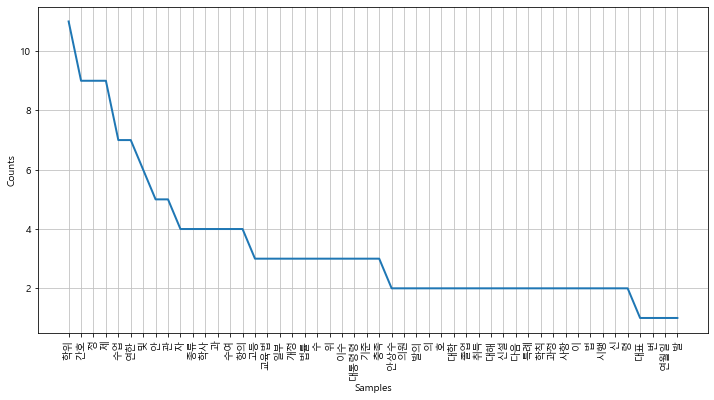

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

plt.figure(figsize = (12,6))
ko.plot(50) # 많이 등장하는 50개
plt.show()

In [21]:
from wordcloud import WordCloud, STOPWORDS

stopwords = ['정', '제', '및', '안', '자', '과', '수', '의', '이', '발']

ko = [each_word for each_word in ko if each_word not in stopwords]
ko

['고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안상수',
 '의원',
 '대표',
 '발의',
 '번',
 '호',
 '발의',
 '연월일',
 '안상수',
 '김정훈',
 '원희목',
 '강석호',
 '서상기',
 '나성린',
 '권영진',
 '이춘식',
 '정영희',
 '이애주',
 '안형환',
 '백성운',
 '김금래',
 '의원',
 '인',
 '제안',
 '이유',
 '내용',
 '현재',
 '간호사',
 '경우',
 '전문',
 '대학',
 '졸업',
 '대학',
 '졸업',
 '면',
 '증',
 '취득',
 '학위',
 '종류',
 '문학사',
 '이기',
 '때문',
 '학',
 '사학',
 '위',
 '취득',
 '위',
 '별도',
 '학사',
 '학위',
 '교육과정',
 '이수',
 '실정',
 '임',
 '간호',
 '교육',
 '필요성',
 '선진',
 '각국',
 '경향',
 '고려',
 '국민',
 '대한',
 '나은',
 '의료',
 '서비스',
 '제공',
 '위',
 '대통령령',
 '기준',
 '충족',
 '간호',
 '대해',
 '수업',
 '연한',
 '로',
 '수여',
 '학위',
 '종류',
 '학사',
 '학위',
 '함',
 '신설',
 '법률',
 '호',
 '고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '고등',
 '교육법',
 '일부',
 '다음',
 '개정',
 '다음',
 '신설',
 '간호',
 '수업',
 '연한',
 '학위',
 '관',
 '특례',
 '대통령령',
 '기준',
 '충족',
 '간호',
 '수업',
 '연한',
 '항의',
 '간호',
 '학칙',
 '과정',
 '이수',
 '대하',
 '학사',
 '학위',
 '수여',
 '항의',
 '학위',
 '종류',
 '수여',
 '관',
 '사항',
 '대통령령',
 '부',
 '칙',
 '법',
 '공포',
 '후',
 '개월',
 '경과',
 '날',
 '시행',
 '법',
 '시행',
 '당시

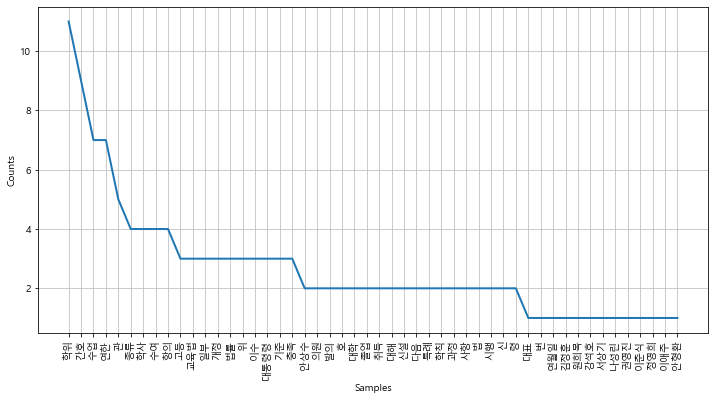

In [22]:
ko = nltk.Text(ko, name = '의안 제1809894호')

plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

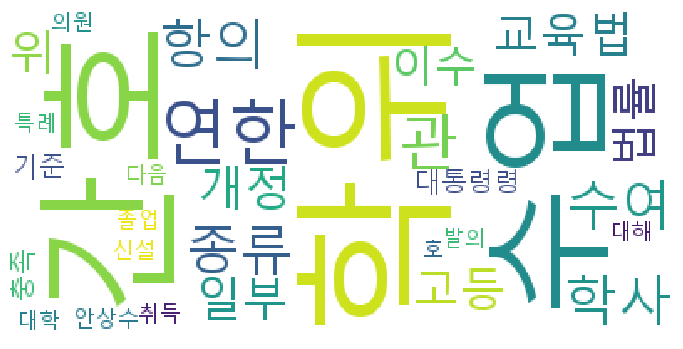

In [23]:
data = ko.vocab().most_common(30)

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf', background_color = 'white').generate_from_frequencies(dict(data))
plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module8

    -Part 02. 텍스트 전처리
    
        04. 정규 표현식

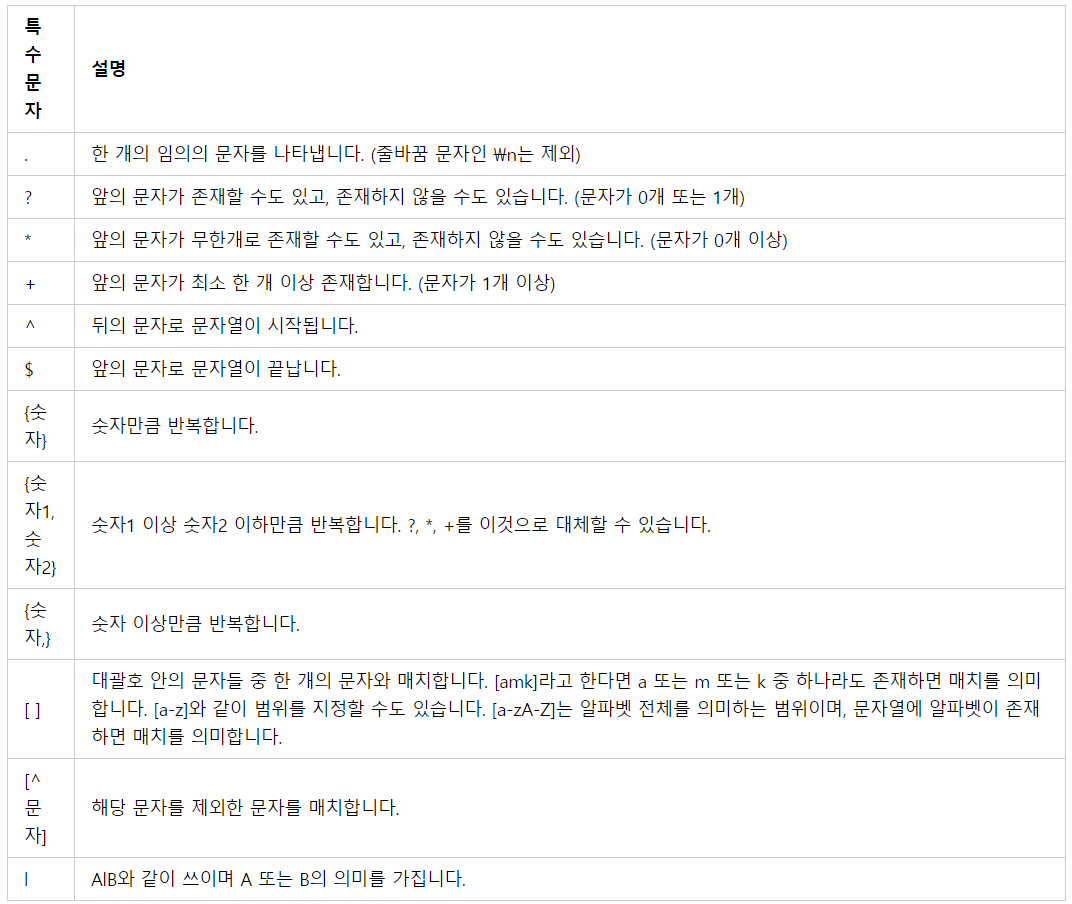

##### 정규표현식 문법 실습
- .기호 : .은 한 개의 임의의 문자를 나타냄
    - 예를 들어서 정규 표현식이 a.c라고 하면, a와 c사이에는 어떤 1개의 문자라도 올 수 있음
    - 즉, akc, azc, a5c, a!c와 같은 형태는 모두 a.c의 정규표현식과 매치

In [24]:
import re
r = re.compile("a.c")
r.search('kkk')

In [25]:
# search는 정규표현식 a.c 패턴이 존재하는지 확인하는 코드
r.search('abc')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

- ?기호 : ?는 ?앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있는 경우를 나타냄
    - 정규 표현식이 ab?c라고 한다면 이 정규 표현식에서의 b는 있다고 취급할 수도 있고, 없다고 취급할 수도 있음. 즉, abc와 ac모두 매치할 수 있음

In [26]:
import re
r = re.compile("ab?c")
r.search("abbc")

In [27]:
# b가 있는 것으로 판단하여 abc를 매치하는 것을 볼 수 있음
r.search("abc")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [28]:
# b가 없는 것으로 판단하여 ac를 매치하는 것을 볼 수 있음
r.search("ac")

<_sre.SRE_Match object; span=(0, 2), match='ac'>

- *기호 : *은 바로 앞의 문자가 0개 이상일 경우를 나타냄. 앞의 문자는 존재하지 않을 수도 있으며, 또는 여러 개일 수도 있음
    - 예를 들어서 정규 표현식이 abc라고 한다면 ac, abc, abbc, abbbc 등과 매치할 수 있으며 b의 갯수는 상관 없음

In [29]:
import re
r = re.compile("ab*c")
r.search("a") # 아무런 결과도 출력되지 않음
r.search("ac")

<_sre.SRE_Match object; span=(0, 2), match='ac'>

In [30]:
r.search("abc")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [31]:
r.search("abbbc")

<_sre.SRE_Match object; span=(0, 5), match='abbbc'>

- ^기호 : ^는 시작되는 글자를 지정
    - 가령 정규표현식이 ^a라면 a로 시작되는 문자열만을 찾아냄

In [32]:
import re
r = re.compile("^a")
r.search("bbc") # 아무것도 출력 x
r.search("ab")

<_sre.SRE_Match object; span=(0, 1), match='a'>

- {숫자} 기호 : 문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타냄
    - 예를 들어서 정규 표현식이 ab{2}c라면 a와 c사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치

In [33]:
import re
r = re.compile("ab{2}c")
r.search("ac") # 아무것도 매치 x
r.search('abc') # 아무것도 매치 x
r.search("abbc")

<_sre.SRE_Match object; span=(0, 4), match='abbc'>

In [34]:
r.search("abbbbbc") # 아무것도 매치 x

- {숫자1, 숫자2} 기호 : 문자에 해당 기호를 붙이면, 해당 문자를 숫자1 이상 숫자2 이하만큼 반복함
    - 예를 들어서 정규 표현식이 ab{2,8}c라면 a와 c사이에 b가 존재하면서 b는 2개 이상 8개 이하인 문자열에 대해서 매치

In [35]:
import re
r = re.compile("ab{2,8}c")
r.search("ac") # 아무것도 출력 x
r.search("abc") # 아무것도 출력 x
r.search("abbc")

<_sre.SRE_Match object; span=(0, 4), match='abbc'>

In [36]:
r.search("abbbbbbbc")

<_sre.SRE_Match object; span=(0, 9), match='abbbbbbbc'>

In [37]:
r.search("abbbbbbbbbbbbbbbbbc")

- {숫자,} 기호 : 문자에 해당 기호를 붙이면 해당 문자를 숫자 이상 만큼 반복함
    - 예를 들어서 정규 표현식이 a{2,}bc라면 뒤에 bc가 붙으면서 a의 갯수가 2개 이상인 경우인 문자열과 매치
    - 또한 만약 {0,}을 쓴다면 *와 동일한 의미가 되며 {1,}을 쓴다면 +와 동일한 의미가 됨

In [39]:
import re
r = re.compile("a{2,}bc")
r.search('bc')
r.search('aa')
r.search('aabc')

<_sre.SRE_Match object; span=(0, 4), match='aabc'>

In [40]:
r.search('aaaaaaaaaaaaaaaaaabc')

<_sre.SRE_Match object; span=(0, 20), match='aaaaaaaaaaaaaaaaaabc'>

- []기호 : []안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치라는 의미
    - 예를 들어서 정규 표현식이 [abc]라면, a 또는 b 또는 c가 들어가있는 문자열과 매치됨
    - [a-zA-z]는 모든 알파벳, [0-9]는 모든 숫자와 같이 번위를 지정하는 것도 가능

In [41]:
import re
r = re.compile("[abc]") # [abc]는 [a-c]와 같음
r.search("zzz")
r.search("a")

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [42]:
r.search("aaaaa")

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [43]:
r.search("baaac")

<_sre.SRE_Match object; span=(0, 1), match='b'>

In [44]:
r = re.compile("[a-z]")
r.search("AAA")
r.search("aBC")

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [45]:
r.search("111")

- [^문자] 기호 : 앞서 설명한 ^와는 완전히 다른 의미로 ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치하는 역할을 함
    - 예를 들어서 [^abc]라는 정규 표현식이 있다면, a 또는 b 또는 c가 들어간 문자열을 제외한 모든 문자열을 매치함

In [46]:
import re
r = re.compile("[^abc]")
r.search("a")
r.search("ab")
r.search("b")
r.search("d")

<_sre.SRE_Match object; span=(0, 1), match='d'>

In [48]:
r.search('1')

<_sre.SRE_Match object; span=(0, 1), match='1'>

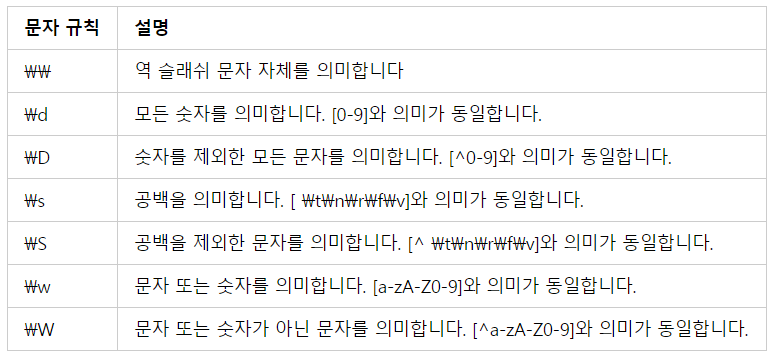

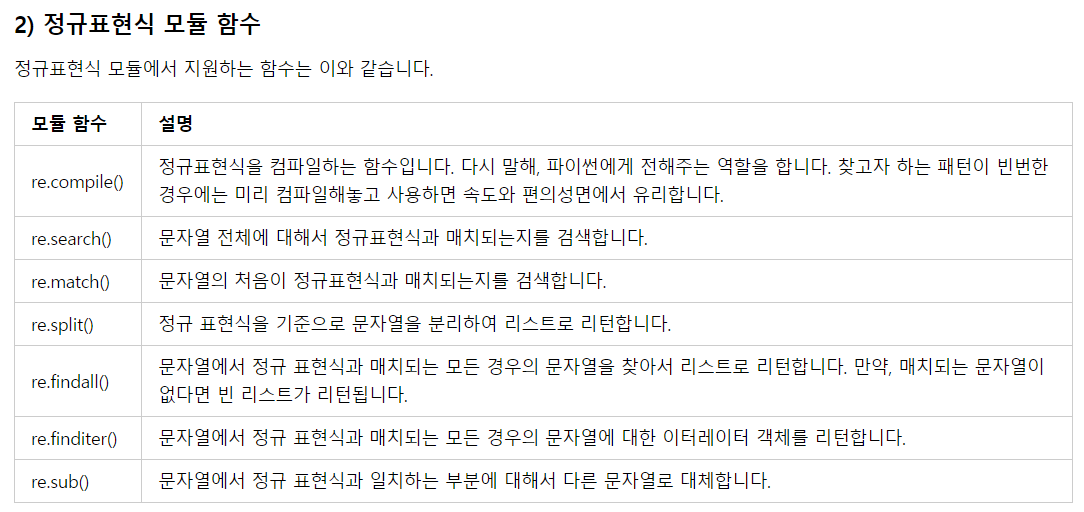

- re.match()와 re.search()의 차이
    - search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인
    - 문자열 중간에 찾을 패턴이 있다고 하더라도, match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않음

In [49]:
import re
r = re.compile("ab.")
# 정규 표현식이 ab.이기 때문에 ab다음에는 어떤 한 글자가 존재할 수 있다는 패턴을 의미

In [50]:
r.search("kkkabc")

<_sre.SRE_Match object; span=(3, 6), match='abc'>

In [51]:
r.match('kkkabc')
r.match('abckkk')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

- re.spilt()
    - 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴
    - 자연어 처리에 있어서 가장 많이 사용되는 정규 표현식 함수 중 하나인데, 토큰화에 유용하게 쓰일 수 있기 때문

In [52]:
import re
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [53]:
import re
text = """사과
딸기
수박
메론
바나나"""
re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [54]:
import re
text = "사과+딸기+수박+메론+바나나"
re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

- re.findall()
    - 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴
    - 단, 매치되는 문자열이 없다면 빈 리스트를 리턴

In [55]:
import re
text = """이름 : 김철수
전화번호 : 010-1234-1234
나이 : 30
성멸 : 남"""
re.findall("\d+", text)

['010', '1234', '1234', '30']

- re.sub()
    - 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체
    
- 영어 문장에 각주 등과 같은 이유로 특수 문자가 섞여있음
- 자연어 처리를 위해 특수 문자를 제거하고 싶다면 알파멧 외의 문자는 공백으로 처리하는 등의 사용 용도로 쓸 수 있음

In [56]:
import re
text = "Regular Expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a 
sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]', ' ', text)

'Regular Expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

In [57]:
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
import re
text = "I was wondering If anyone out there could enlighten me on this car."
shortword = re.compile(r'\\*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering  anyone out there could enlighten   this car.


In [ ]:
# 1번 문제: 정규표현식으로 번호 추출하기
import re
text = "제 휴대폰 번호는 010-1234-5678이고, 전화 번호는 0211334477입니다."
######################################


In [ ]:
# 2번 문제: 정규표현식으로 번호 추출하기
import re
text = "제 휴대폰 번호는 010-1234-5678이고, 전화 번호는 0211334477과 02.1133.5599입니다."
#######################################3
